# TASK 3- IRIS FLOWER DATASET 

### Importing the Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

### Importing the dataset

In [4]:
iris = pd.read_csv('Iris.csv')

In [5]:
print(iris.shape)

(150, 6)


In [6]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### SCATTER PLOT

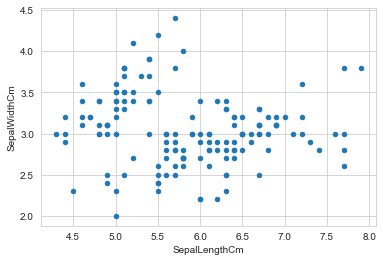

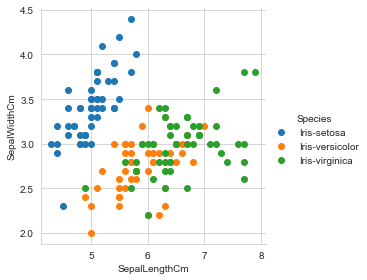

In [12]:
iris.plot(kind="scatter", x = 'SepalLengthCm', y = 'SepalWidthCm')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "Species", size = 4)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend()
plt.show()

### PAIR PLOT

C:\Users\N.J\.conda\New folder\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


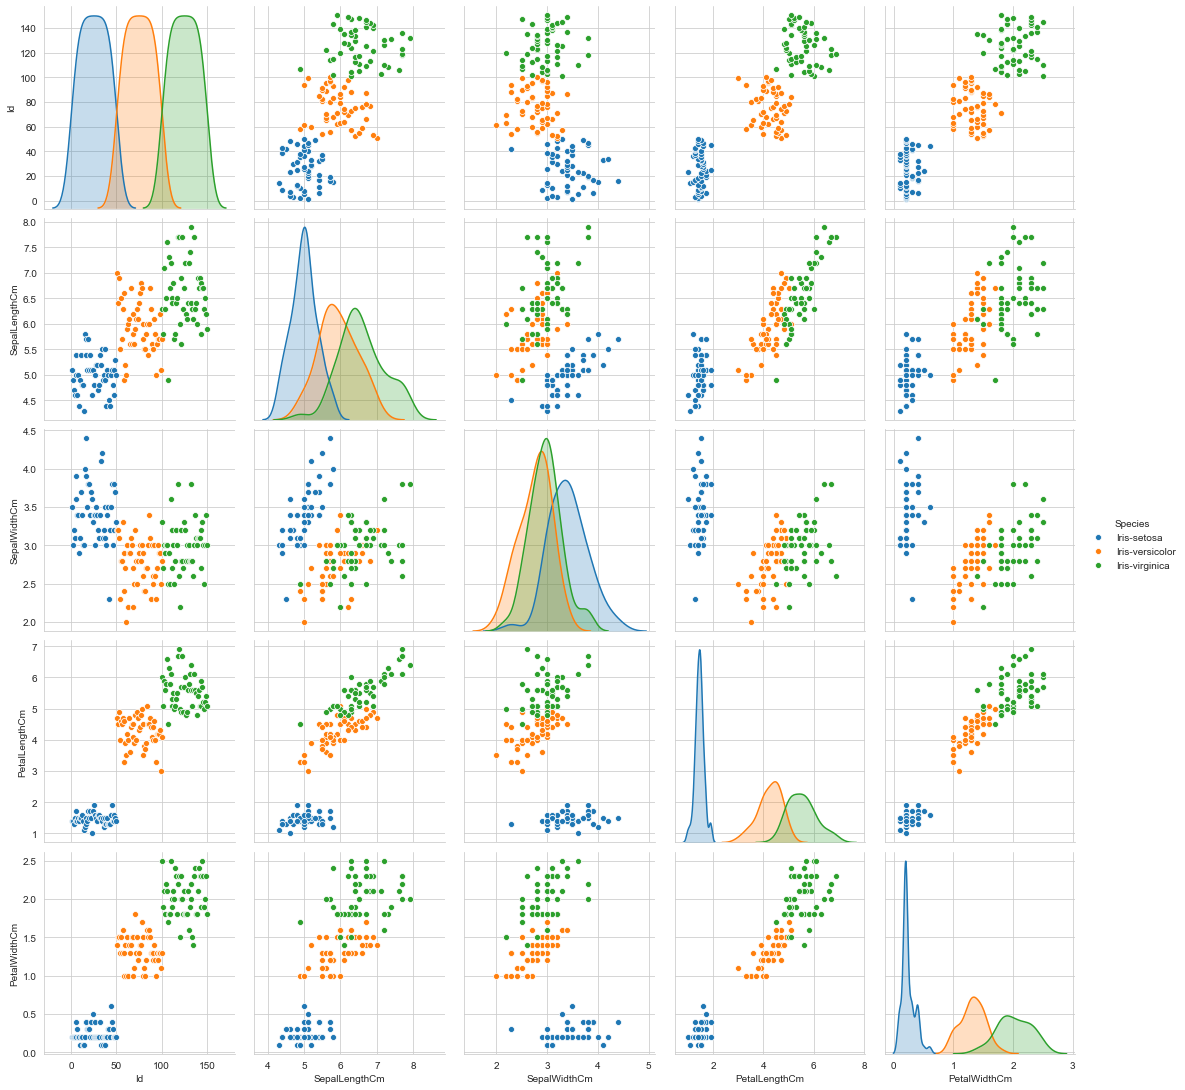

In [17]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue= "Species", size = 3, diag_kind = "kde")
plt.show()

### Histogram

C:\Users\N.J\.conda\New folder\ANACONDA\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


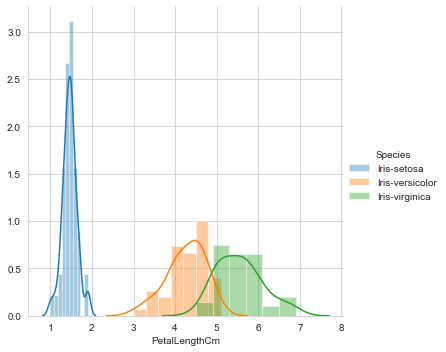

In [18]:
sns.FacetGrid( iris, hue = "Species", size = 5)\
.map(sns.distplot, "PetalLengthCm")\
.add_legend()
plt.show()

### CDF and PDF


In [24]:
import numpy as np 
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"]
iris_verginica = iris.loc[iris["Species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"]

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


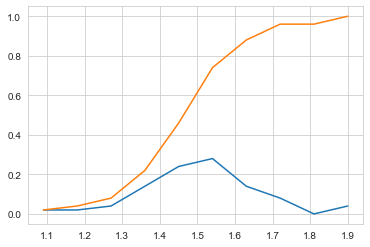

In [25]:
counts, bin_edges = np.histogram ( iris_setosa["PetalLengthCm"], bins = 10, density = True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


### Mean, Variance & Standard Deviation

In [26]:
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50)))
print(np.mean(iris_verginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))

print("\Std. Dev:")
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_verginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))

Means:
1.464
2.4156862745098038
5.552
4.26
\Std. Dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


### Median

In [27]:
print("\n Median")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)))
print(np.median(iris_verginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))


 Median
1.5
1.5
5.55
4.35


### Qunatiles & Percentiles

In [28]:
print("\n Quantiles")
print(np.percentile(iris_setosa["PetalLengthCm"], np.arange(0,100,25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0,100,25)))
print(np.percentile(iris_verginica["PetalLengthCm"], np.arange(0,100,25)))


 Quantiles
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


### Median Absolute Deviation

In [29]:
from statsmodels import robust
print("\nMAD")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))
print(robust.mad(iris_verginica["PetalLengthCm"]))


MAD
0.14826022185056031
0.5189107764769602
0.6671709983275211


### Box Plot With Whiskers

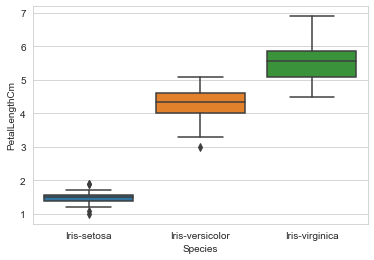

In [30]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

### Violet plot

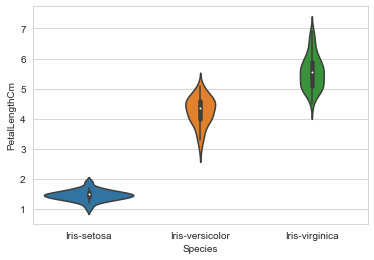

In [31]:
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris, size= 4)
plt.show()

### Multivariate Probability Density ( Countour Plot)

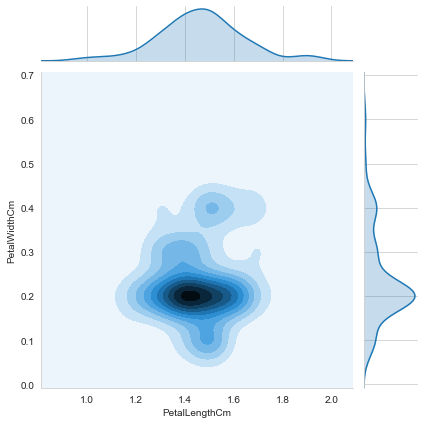

In [32]:
sns.jointplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = iris_setosa, kind = 'kde')
plt.show()

### Finding the optimum number of clusters for k-means classification

In [34]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### The Elbow Method


Plotting the results onto a line graph

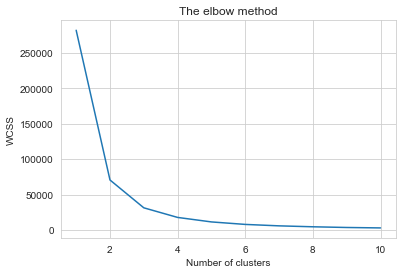

In [35]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

From this we choose the number of clusters as '3'

### Applying kmeans to the dataset 

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters - On the first two columns

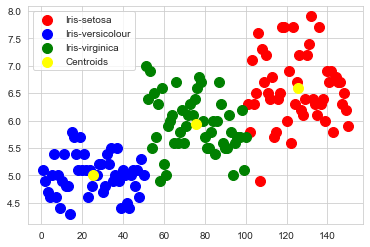

In [37]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()